In [1]:
import vectorbt as vbt
import numpy as np
import pandas as pd
import pytz
from datetime import datetime, timedelta
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

# Parâmetros

In [2]:
seed = 42
simbolo = 'BTC-USD'
metrica = 'total_return'

data_inicio = datetime(2017, 1, 1, 0, 0, 0)
data_fim = datetime(2022, 8, 10, 23, 59, 59)
data_inicio = pytz.timezone('utc').localize(data_inicio)
data_fim = pytz.timezone('utc').localize(data_fim)

delta = 100

qtd_splits=20
tamanho_treinamento=365 # tamanho do conjunto utilizado para fazer a seleção das médias
tamanho_validacao=180 # tamanho dos subconjuntos para validação

freq='1d'

vbt.settings.portfolio['init_cash'] = 1000.0
vbt.settings.portfolio['fees'] = 0.001  # 0.1%
vbt.settings.portfolio['slippage'] = 0.0
vbt.settings.portfolio['freq'] = freq

direction='longonly' # opções: longonly, shortonly, both

# Dados

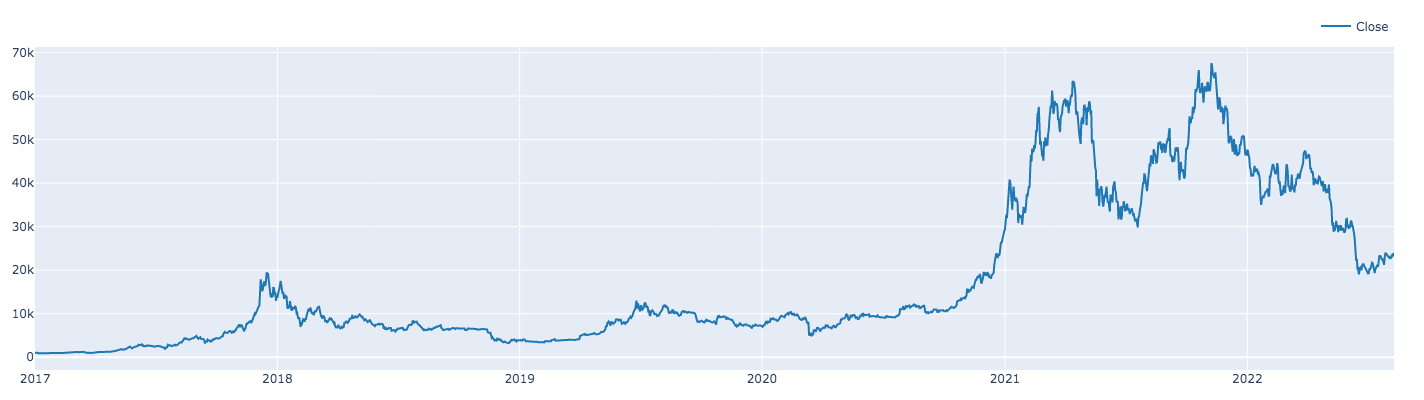

In [3]:
time_buffer = timedelta(days=delta) 
precos_buf = vbt.YFData.download(simbolo, start=data_inicio-time_buffer, end=data_fim, interval=freq, missing_index='drop').get('Close')
precos_buf = precos_buf.astype(np.float64)
  
precos = precos_buf[data_inicio:data_fim]
precos.vbt.plot(width=1000, height=400).show()

# Separação dos dados para simulação

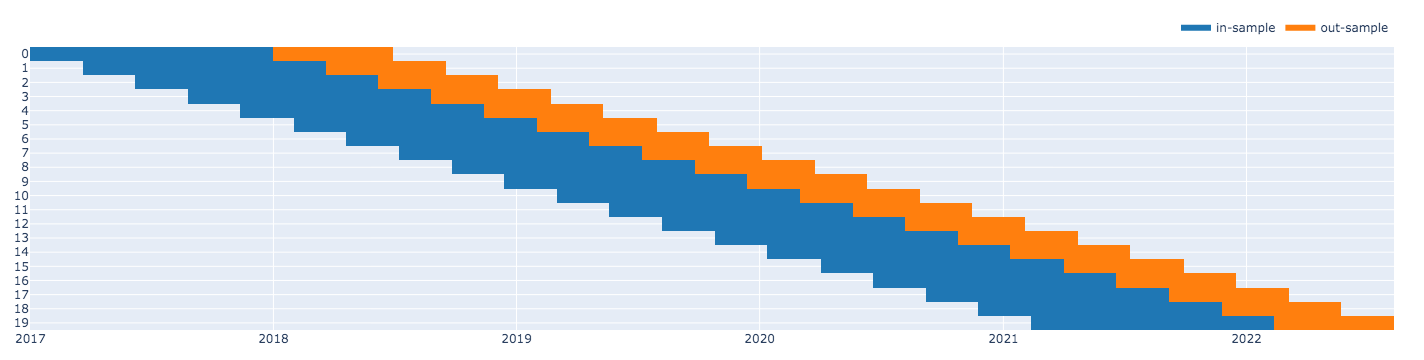

In [4]:
split_kwargs = dict(
    n=qtd_splits,
    window_len=tamanho_treinamento + tamanho_validacao + delta, # primeiros dias(delta) serão descartados
    left_to_right=False
)
split_kwargs_plot = dict(
    n=qtd_splits,
    window_len=tamanho_treinamento + tamanho_validacao, # primeiros dias(delta) serão descartados
    set_lens=(tamanho_validacao,),
    left_to_right=False
)

precos.vbt.rolling_split(**split_kwargs_plot, plot=True, trace_names=['in-sample', 'out-sample']).show()
(splits_precos, splits_indices) = precos_buf.vbt.rolling_split(**split_kwargs )

In [5]:
splits_precos

split_idx           0            1            2            3            4   \
0           602.841980   769.731018  1179.969971  1888.650024  3252.909912   
1           602.625000   780.086975  1222.500000  1987.709961  3213.939941   
2           600.825989   780.556030  1251.010010  2084.729980  3378.939941   
3           608.043030   781.481018  1274.989990  2041.199951  3419.939941   
4           606.166016   778.088013  1255.150024  2173.399902  3342.469971   
..                 ...          ...          ...          ...          ...   
640        6249.180176  6351.799805  4017.268555  3673.836182  5829.501465   
641        6093.669922  6517.310059  4214.671875  3915.714355  5982.457520   
642        6157.129883  6512.709961  4139.877930  3947.094482  6174.528809   
643        5903.439941  6543.200195  3894.130859  3999.820557  6378.849121   
644        6218.299805  6517.180176  3956.893799  3954.118164  7204.771484   

split_idx           5             6            7            8            9   \
0          5526.640137  13405.799805  6973.529785  6734.819824  6792.830078   
1          5750.799805  13980.599609  6844.229980  6769.939941  6529.169922   
2          5904.830078  14360.200195  7083.799805  6776.549805  6467.069824   
3          5780.899902  13772.000000  7456.109863  6729.740234  6225.979980   
4          5753.089844  13819.799805  6853.839844  6083.689941  6300.859863   
..                 ...           ...          ...          ...          ...   
640        9870.303711   8321.005859  7193.599121  6191.192871  9653.679688   
641        9477.677734   8374.686523  7200.174316  6198.778320  9758.852539   
642        9552.860352   8205.369141  6985.470215  6185.066406  9771.489258   
643        9519.145508   8047.526855  7344.884277  5830.254883  9795.700195   
644        9607.423828   8103.911133  7410.656738  6416.314941  9870.094727   

split_idx            10            11            12            13  \
0           4347.109863   3690.188232   5350.726562  10666.482422   
1           3880.760010   3648.430664   5402.697266  10530.732422   
2           4009.969971   3653.528564   5505.283691  10767.139648   
3           3779.129883   3632.070557   5768.289551  10599.105469   
4           3820.719971   3616.880859   5831.167480  10343.106445   
..                  ...           ...           ...           ...   
640        11774.595703  15701.339844  34316.386719  56216.183594   
641        11366.134766  16276.343750  34269.523438  55724.265625   
642        11488.363281  16317.808594  33114.359375  56473.031250   
643        11323.397461  16068.138672  33537.175781  53906.089844   
644        11542.500000  15955.587891  35510.289062  51762.273438   

split_idx            14            15            16            17  \
0           8151.500488   7322.532227   4970.788086   9700.414062   
1           7988.155762   7275.155762   5563.707031   9461.058594   
2           8245.623047   7238.966797   5200.366211  10167.268555   
3           8228.783203   7290.088379   5392.314941   9529.803711   
4           8595.740234   7317.990234   5014.479980   9656.717773   
..                  ...           ...           ...           ...   
640        34235.195312  42839.750000  50098.335938  44354.636719   
641        33855.328125  42716.593750  46737.480469  43924.117188   
642        32877.371094  43208.539062  46612.632812  42451.789062   
643        33798.011719  42235.730469  48896.722656  39137.605469   
644        33520.519531  41034.542969  47665.425781  39400.585938   

split_idx            18            19  
0          12254.402344  14133.707031  
1          11991.233398  15579.848633  
2          11758.283203  15565.880859  
3          11878.372070  14833.753906  
4          11592.489258  15479.567383  
..                  ...           ...  
640        30314.333984  22961.279297  
641        29200.740234  23175.890625  
642        29432.226562  23809.486328  
643        30323.722656  23164.318359  
644        29098

# Seleção das melhores médias

In [6]:
windows = np.arange(2, 101, step=2)
fast_ma, slow_ma = vbt.MA.run_combs(splits_precos, window=windows, r=2, short_names=['fast', 'slow'])

sinais_entrada = fast_ma.ma_crossed_above(slow_ma)
sinais_saida = fast_ma.ma_crossed_below(slow_ma)

# descarta as primeiras posições
sinais_entrada = sinais_entrada[delta:]
sinais_saida = sinais_saida[delta:]

splits_precos = splits_precos[delta:]
splits_indices = [indices[delta:] for indices in splits_indices]

in_sinais_entrada = sinais_entrada[0:tamanho_treinamento]
in_sinais_saida = sinais_saida[0:tamanho_treinamento]

out_sinais_entrada = sinais_entrada[tamanho_treinamento:]
out_sinais_saida = sinais_saida[tamanho_treinamento:]

in_price = splits_precos[0:tamanho_treinamento]
in_indexes = [indices[0:tamanho_treinamento] for indices in splits_indices]

out_price = splits_precos[tamanho_treinamento:]
out_indexes = [indices[tamanho_treinamento:] for indices in splits_indices]

In [7]:
# Estratégia Cruzamento de Médias
pf_combs = vbt.Portfolio.from_signals(in_price, in_sinais_entrada, in_sinais_saida, direction=direction)
retornos = pf_combs.total_return() * 100

# Melhores resultados
indices_melhores = retornos.groupby('split_idx').idxmax()

melhores_retornos = retornos[indices_melhores]

melhores_retornos_df = pd.DataFrame(melhores_retornos)
melhores_retornos_df.rename(columns = {'total_return':'in-sample'}, inplace = True)

melhores_retornos_df

in-sample
fast_window slow_window split_idx             
10          22          0          1851.784924
                        1          1076.221880
                        2           432.597601
2           18          3           254.725233
            4           4           128.984209
38          100         5            15.053579
                        6            57.269595
52          74          7           277.393071
30          58          8           221.966754
42          66          9           194.752068
34          86          10          185.244029
12          18          11          102.308884
            24          12          110.859036
16          18          13          146.485110
14          28          14          498.811138
12          42          15          695.393823
60          62          16          428.159295
32          36          17          719.578944
6           8           18          184.663744
28          32          19           99.156997

# Validação

In [8]:
pf_validacao = vbt.Portfolio.from_signals(out_price, out_sinais_entrada, out_sinais_saida, direction=direction)
retornos_val = pf_validacao.total_return()
melhores_retornos_df['validacao'] = retornos_val[indices_melhores].values * 100

# Estratégia Buy and Hold
pf_holding = vbt.Portfolio.from_holding(out_price)
retornos_holding = pf_holding.total_return() * 100
melhores_retornos_df['holding'] = retornos_holding.values

In [9]:
melhores_retornos_df.mean()

in-sample    384.070496
validacao     19.248685
holding       26.931809
dtype: float64

In [10]:
melhores_retornos_df

in-sample   validacao     holding
fast_window slow_window split_idx                                     
10          22          0          1851.784924  -14.388821  -54.514193
                        1          1076.221880    2.817136  -27.086290
                        2           432.597601  -13.083912  -48.157608
2           18          3           254.725233  -16.962972  -41.106083
            4           4           128.984209   42.233686   13.178473
38          100         5            15.053579  146.026718  175.171344
                        6            57.269595    0.000000   52.333573
52          74          7           277.393071  -25.415746  -41.121649
30          58          8           221.966754  -51.248405  -21.050247
42          66          9           194.752068  -33.243872   38.395592
34          86          10          185.244029   -3.568481   30.004489
12          18          11          102.308884   65.047179   67.380860
            24          12          110.859036  188.140294  205.778545
16          18          13          146.485110   90.808005  296.821987
14          28          14          498.811138  -19.431791   -1.285054
12          42          15          695.393823   17.944768  -30.969060
60          62          16          428.159295   12.483000   33.389579
32          36          17          719.578944    2.793787  -15.914814
6           8           18          184.663744   -7.105534  -49.244866
28          32          19           99.156997    1.128666  -43.368399

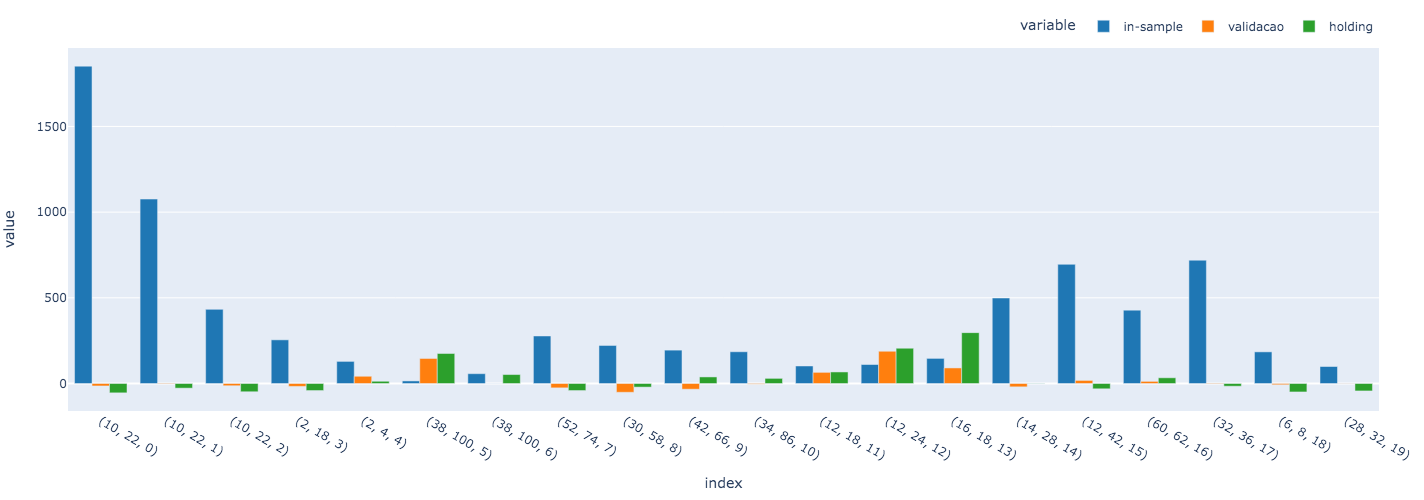

In [11]:
fig = melhores_retornos_df.vbt.px.bar(width=1000, height=500)
fig.update_layout(barmode='group')
fig.show()

Split 0:


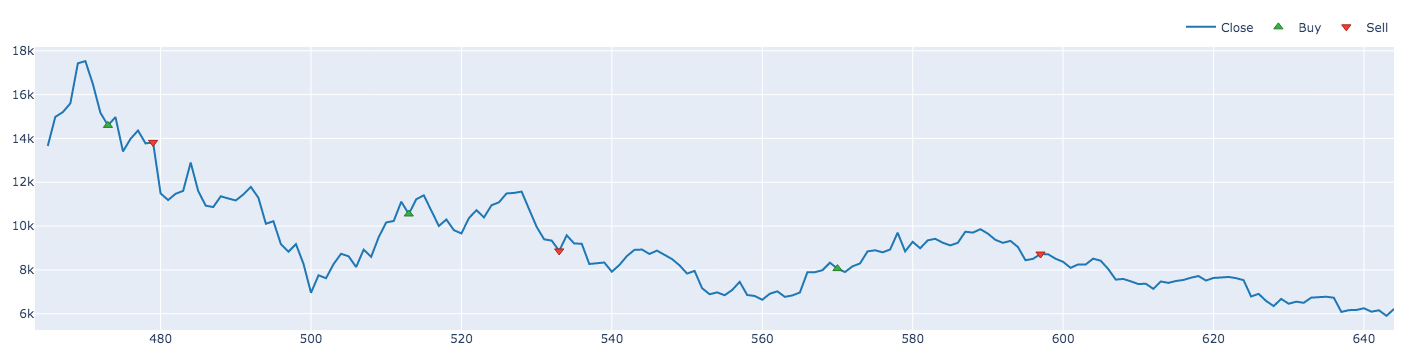

Split 1:


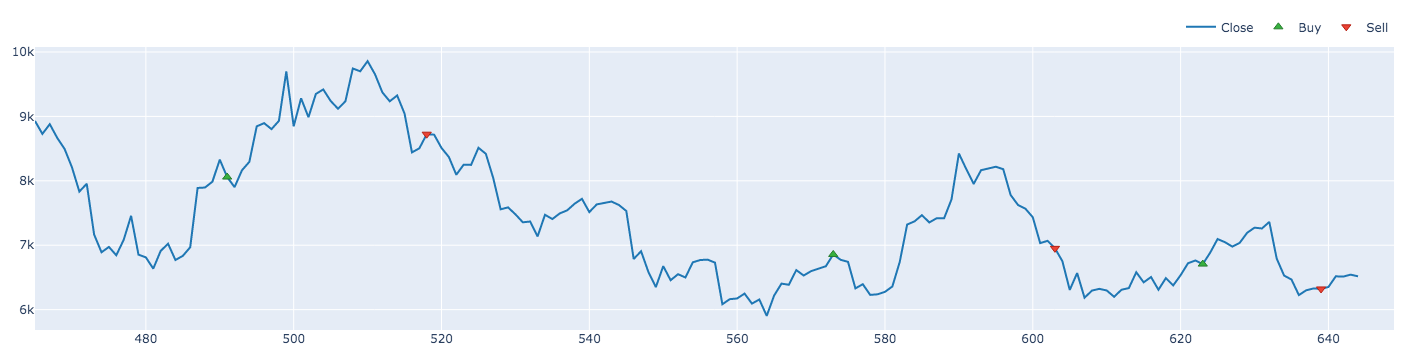

Split 2:


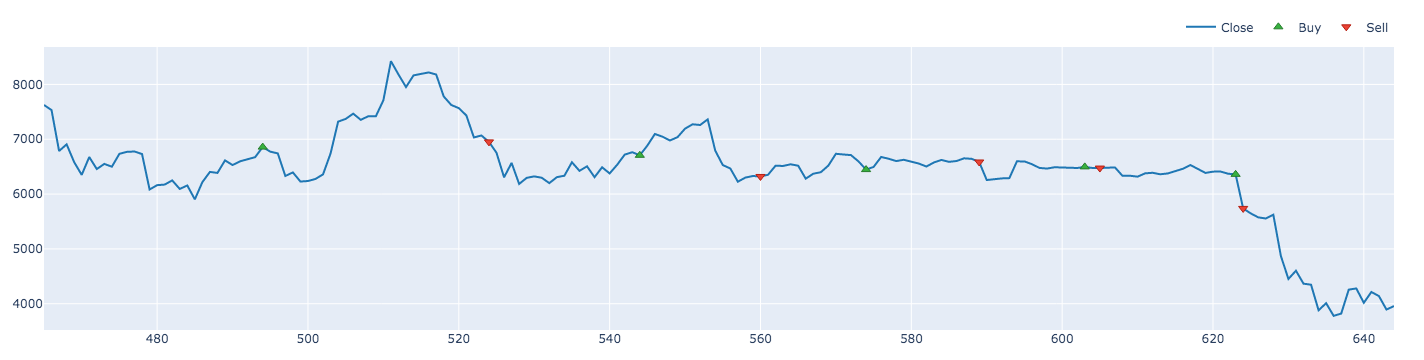

Split 3:


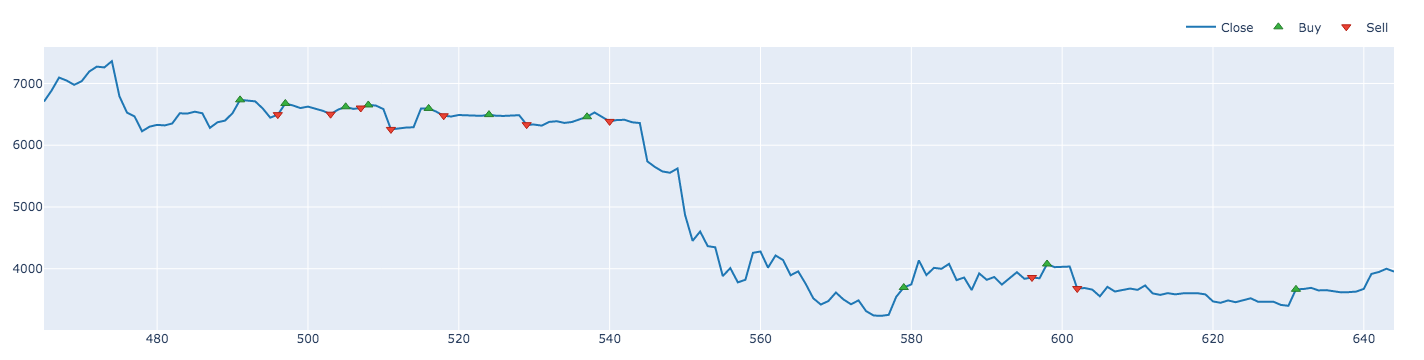

Split 4:


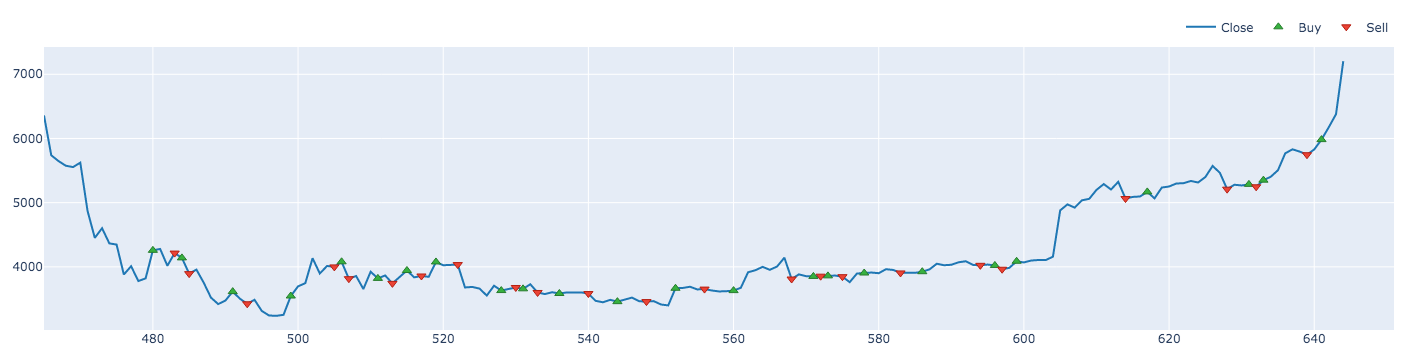

Split 5:


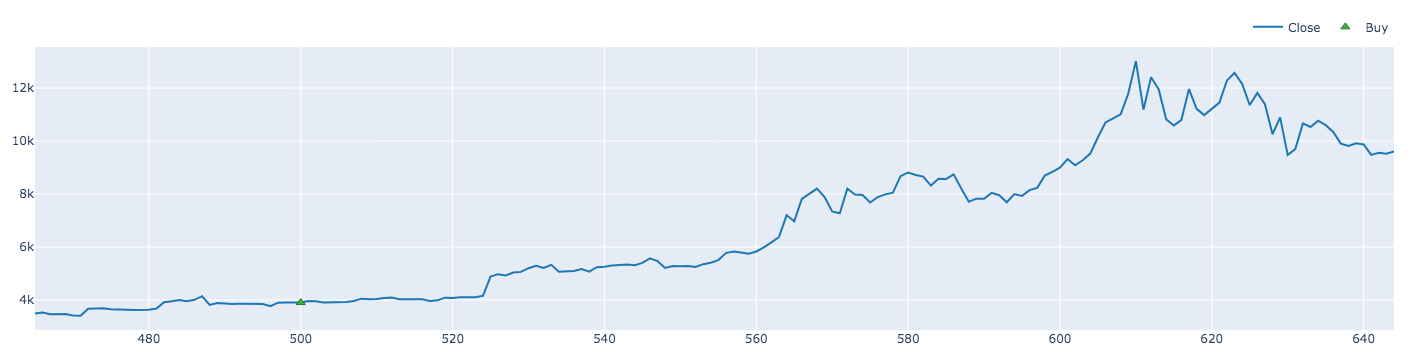

Split 6:


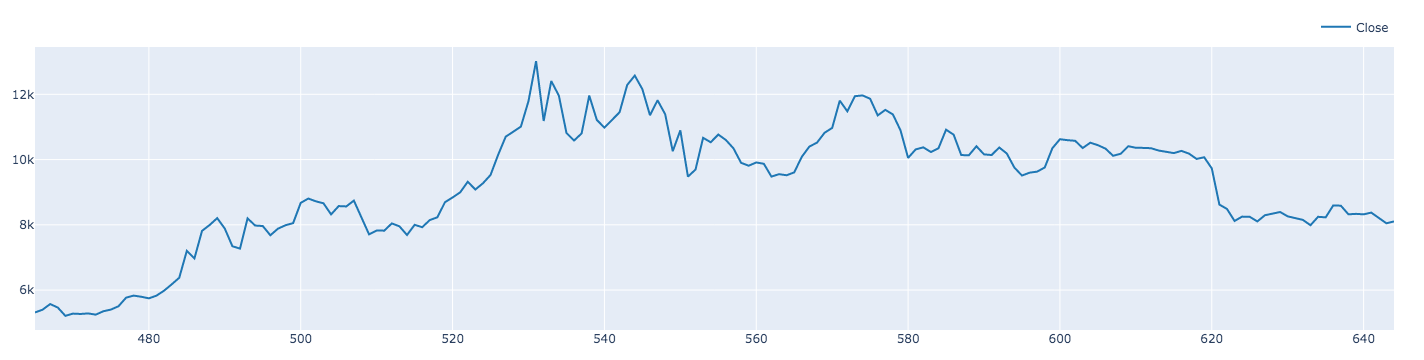

Split 7:


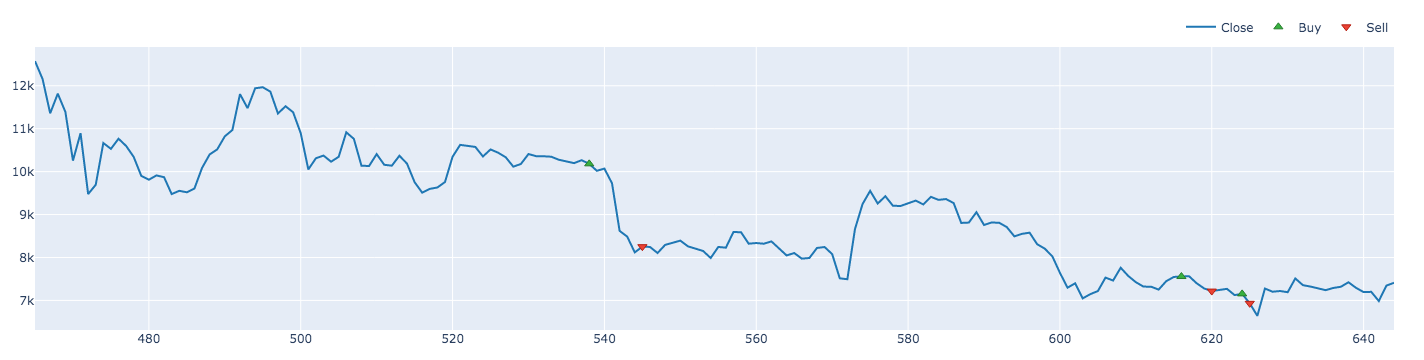

Split 8:


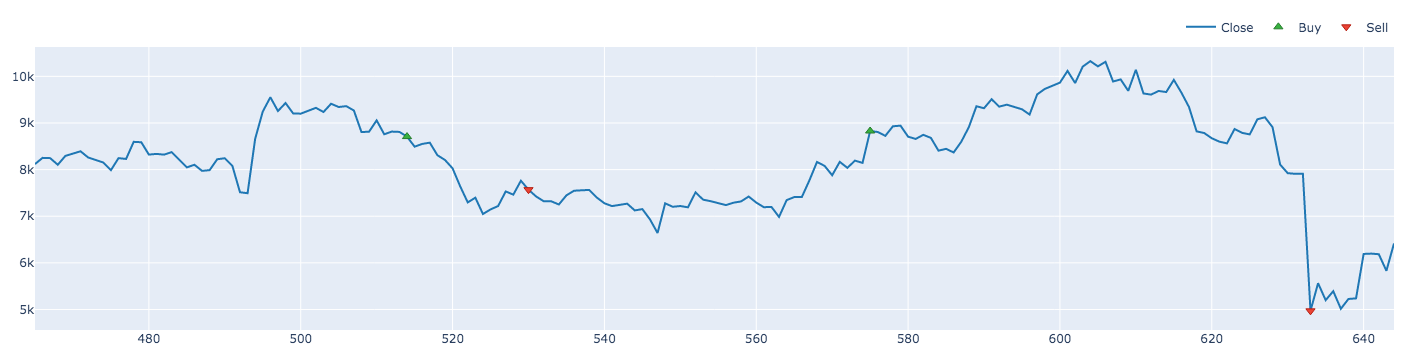

Split 9:


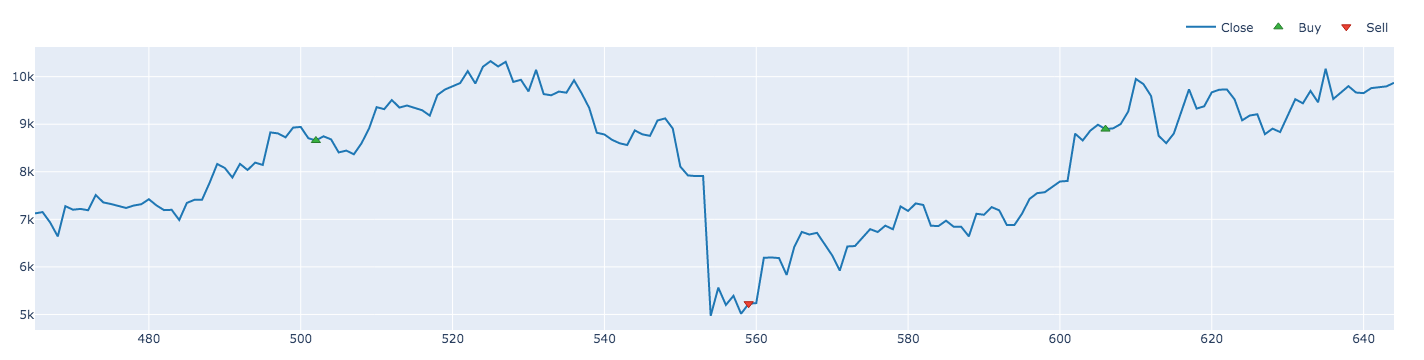

Split 10:


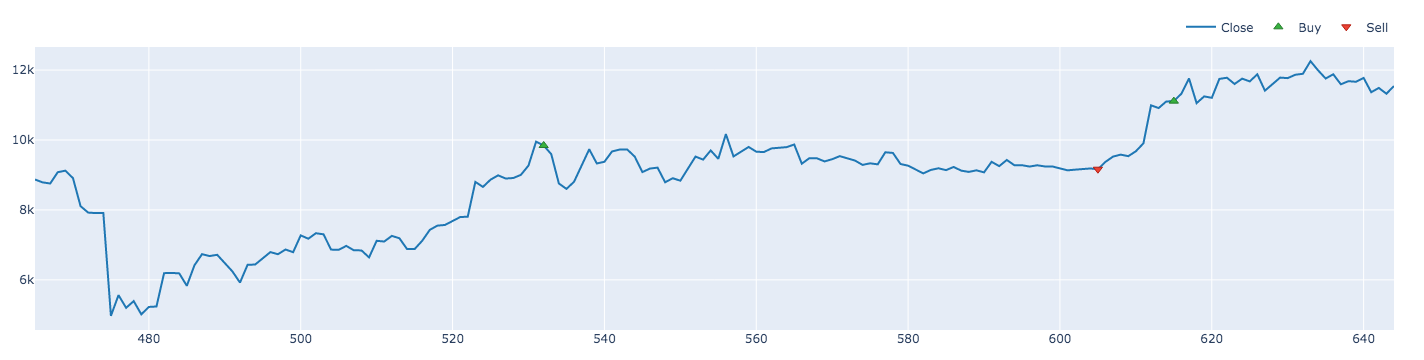

Split 11:


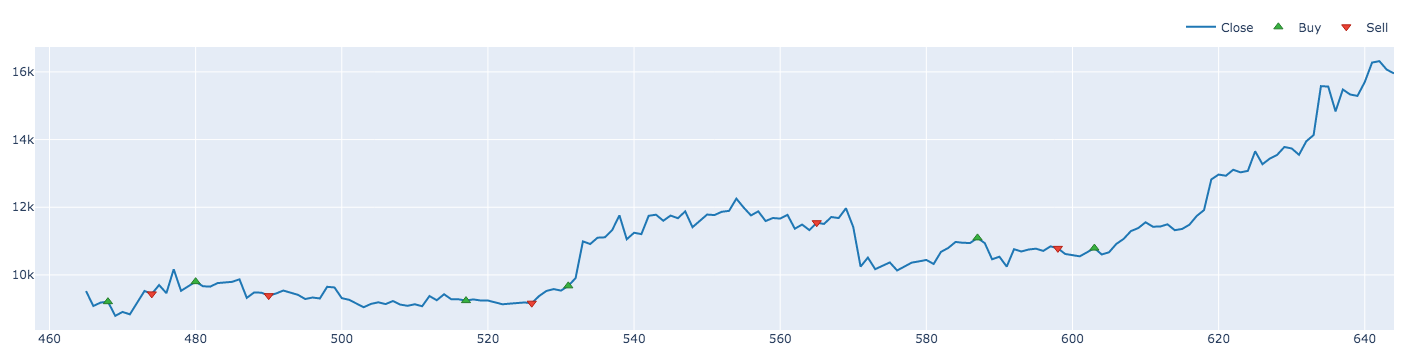

Split 12:


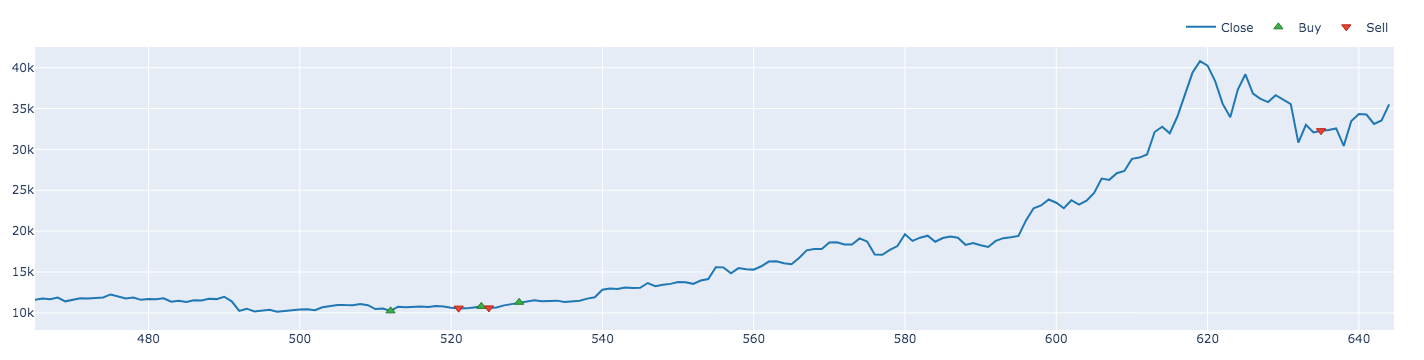

Split 13:


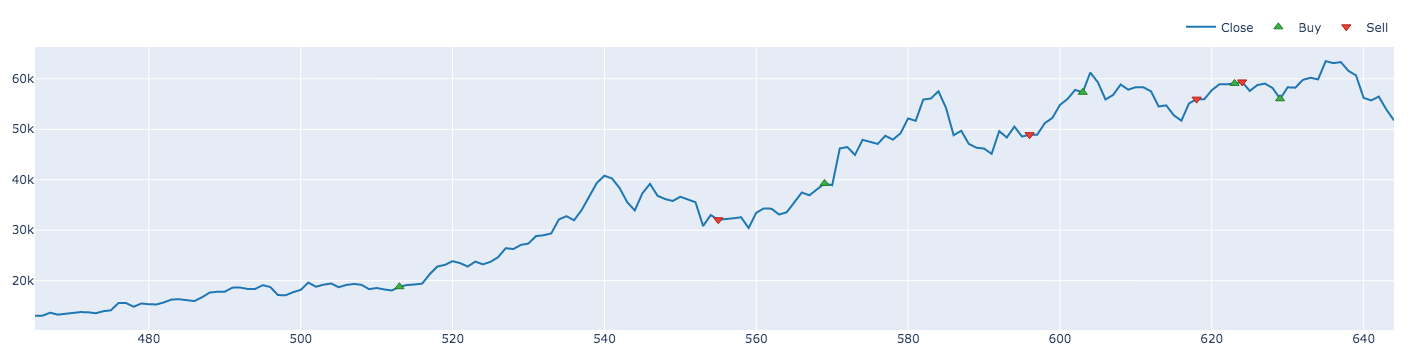

Split 14:


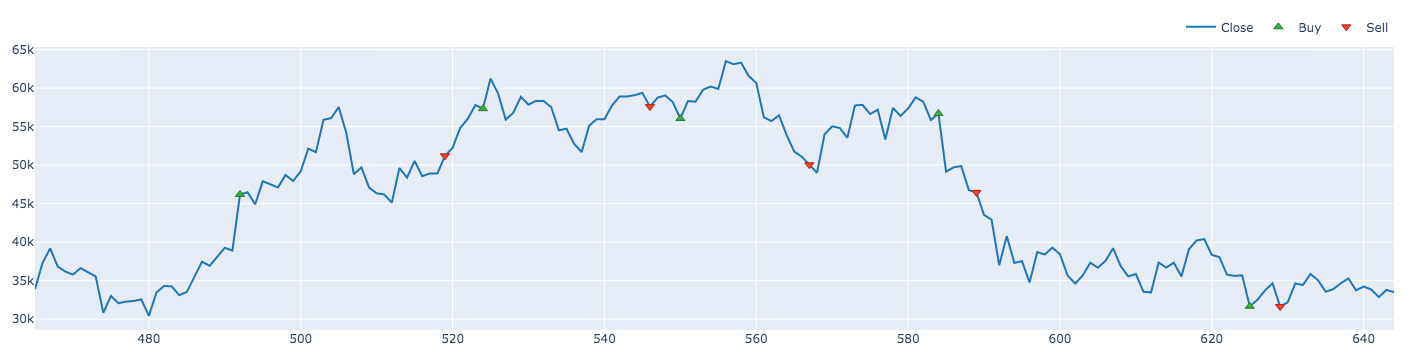

Split 15:


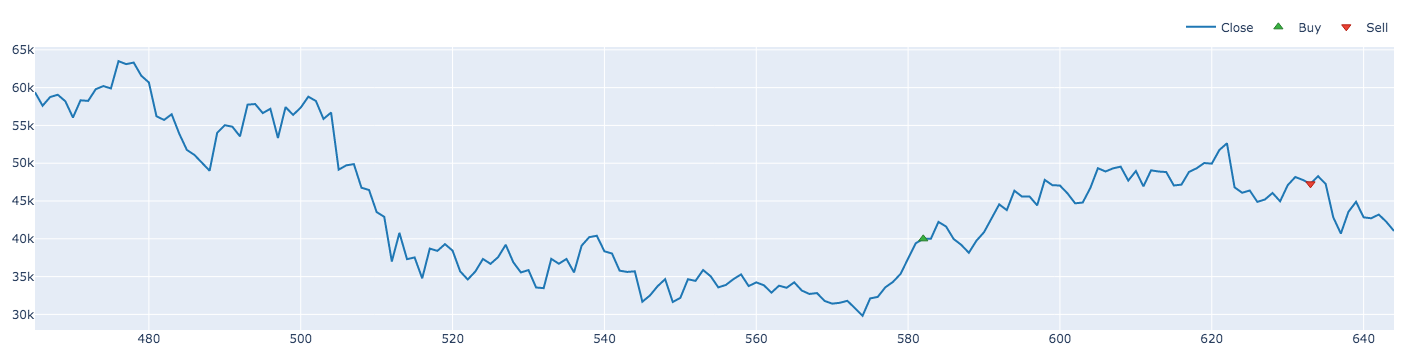

Split 16:


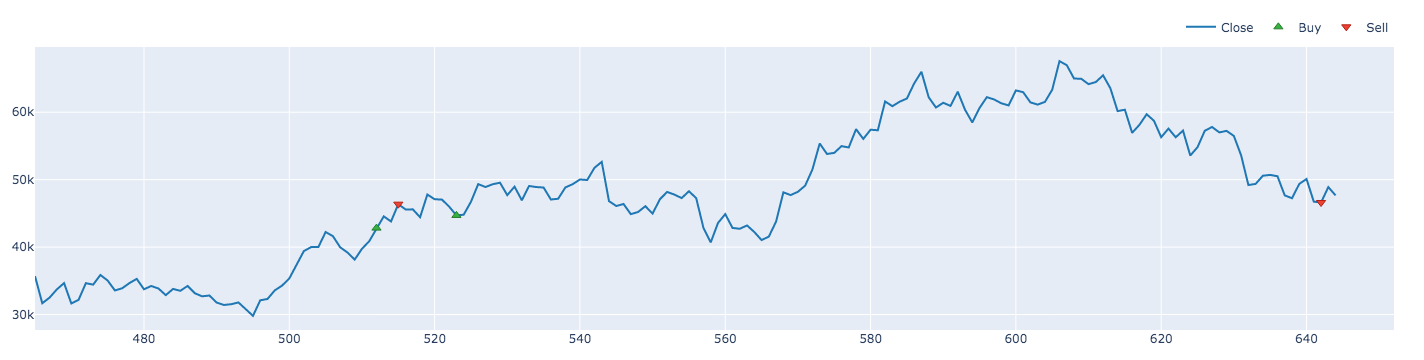

Split 17:


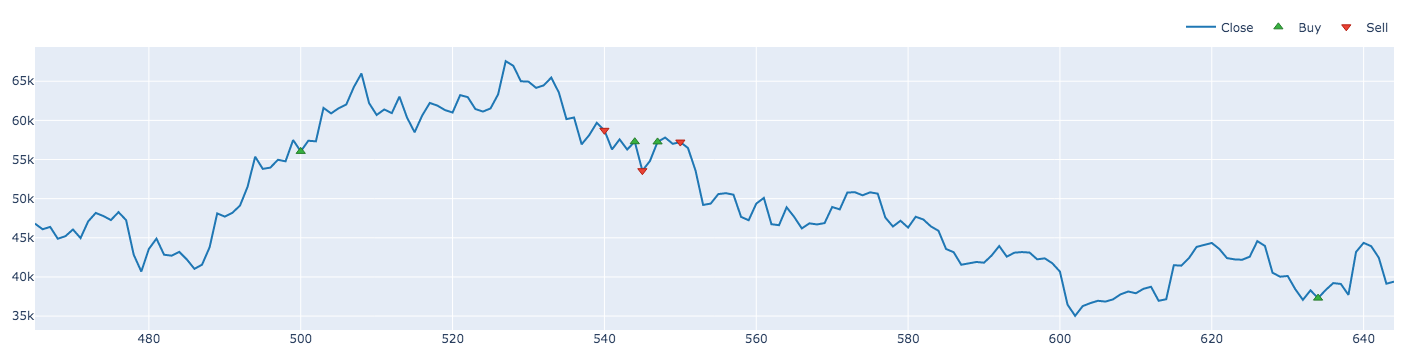

Split 18:


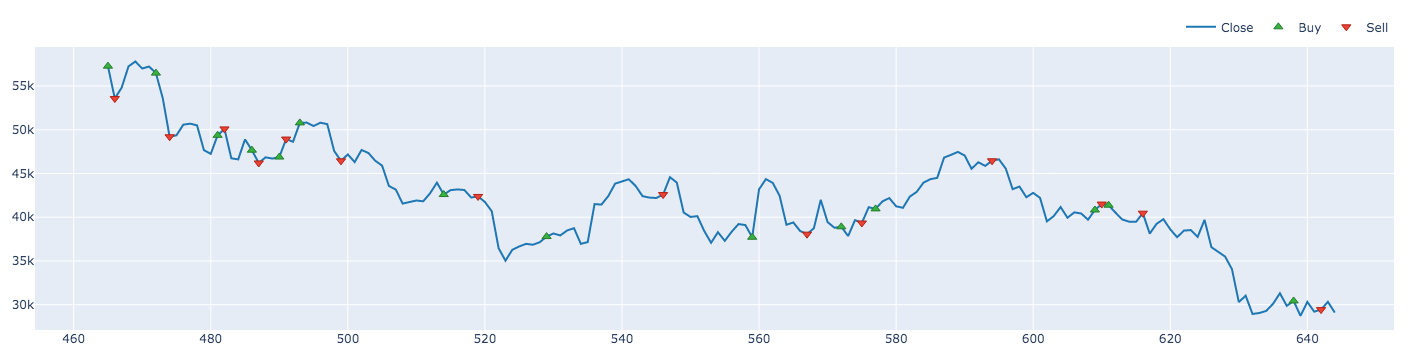

Split 19:


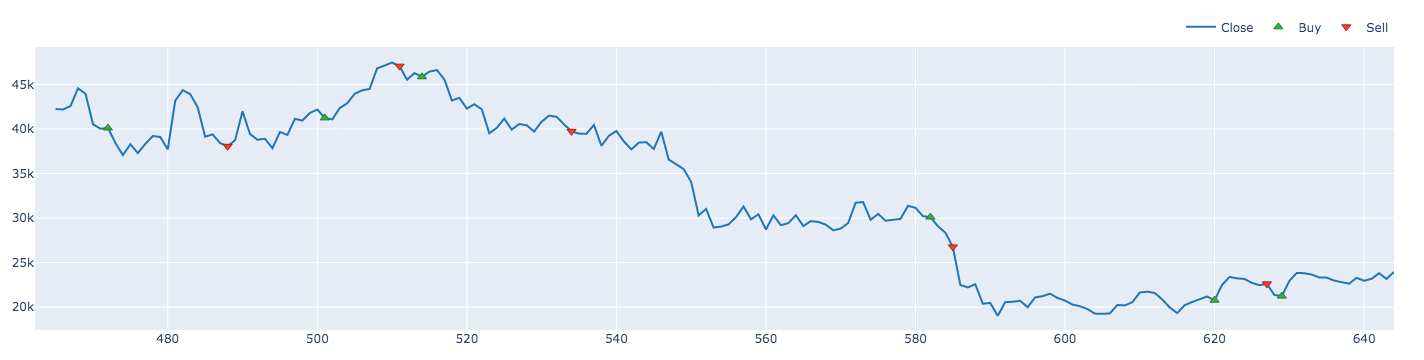

In [12]:
for i in indices_melhores:
    print('Split %s:' % i[2])
    pf_validacao[i].orders.plot().show()